## Processing DEM Data

In [1]:
import os
import subprocess
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

#### Execute as in the command line

In [2]:
dem_input_path = 'data/dem/north_mexico_clip.tif'
dem_output_path = 'output/north_mexico_cmd_slope.tif'
cmd = f'gdaldem slope {dem_input_path} {dem_output_path} -compute_edges'
# both of the methods below are valid. subprocess.call is recommended
# os.system(cmd)
# subprocess.call(cmd.split())

In [3]:
slope = gdal.Open(dem_output_path)
slope_band = slope.GetRasterBand(1)
slope_array = slope_band.ReadAsArray()
slope_array = slope_array.astype(np.int16)

In [26]:
slope_array.max()

55

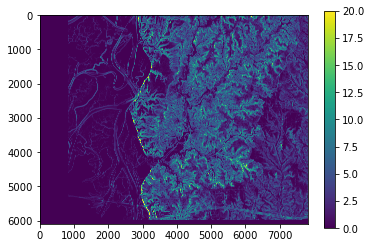

In [8]:
plt.figure()
plt.imshow(slope_array, vmin=0, vmax=20)
plt.colorbar()

In [9]:
slope_array = None
slope_band = None
slope = None

#### Processing using GDAL in a Python Script

##### Slope

In [2]:
dem_input_path = 'data/dem/north_mexico_clip.tif'
dem_output_path = 'output/north_mexico_gdal_slope.tif'

In [3]:
dem = gdal.Open(dem_input_path)
slope_gdal = gdal.DEMProcessing(dem_output_path, dem, 'slope', computeEdges=True)

In [17]:
slope_gdal_array = slope_gdal.GetRasterBand(1).ReadAsArray()
slope_gdal_array = slope_gdal_array.astype(np.int16)

In [19]:
slope_gdal_array.min()

-9999

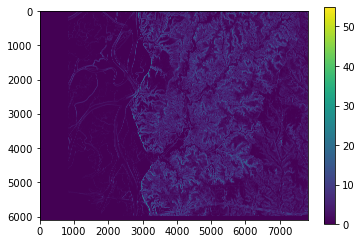

In [21]:
plt.figure()
plt.imshow(slope_gdal_array, vmin=0, vmax=55)
plt.colorbar()

##### Hillshade

In [23]:
hillshade_output_path = 'output/north_mexico_gdal_hillshade.tif'
# hillshade = gdal.Open(hillshade_output_path)
hillshade = gdal.DEMProcessing(hillshade_output_path, dem, 'hillshade', zFactor=5, computeEdges=True)
hillshade_array = hillshade.GetRasterBand(1).ReadAsArray()

In [25]:
hillshade_array[:100, :100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
hillshade_array.max()

255

In [5]:
dem_array = dem.GetRasterBand(1).ReadAsArray()

In [32]:
dem_array.max()

76.22111

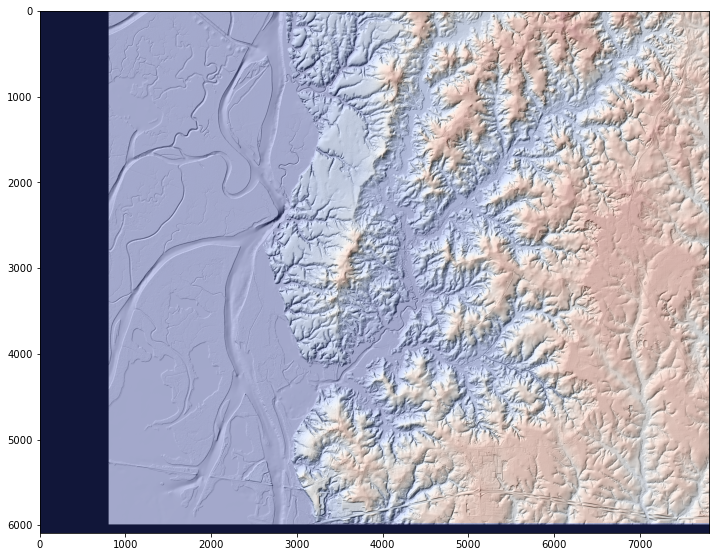

In [24]:
plt.figure(figsize=(12, 12))
plt.imshow(hillshade_array, cmap='gray', vmin=0, vmax=222)
plt.imshow(dem_array, cmap='coolwarm', vmin=0, vmax=80, alpha=0.3)
plt.show()

In [28]:
dem_array = dem = None
hillshade_array = hillshade = None

In [29]:
# !pip install richdem